## Key Questions to Ask:

1) What causes good ratings?

2) What causes bad ratings?

3) Any correlation between features?

4) Any correlation between features and dishes people like?

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import pandas as pd
data = pd.read_csv('Dataset/zomato-bangalore-restaurants/zomato.csv').iloc[:100,2:]
data.iloc[:5,:]

,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [56]:
categorical = ['online_order','book_table','location','rest_type',
            'listed_in(type)','listed_in(city)']
numerical = ['rate','votes','approx_cost(for two people)']
# NL_features = ['dish_liked','cuisines','reviews_list']
cat = data[categorical]
num = data[numerical]
# data

Filtering the rating information

In [57]:
import re
import numpy as np
import copy
reg = r'[0-9][[\.][0-9]]*'
ratings = copy.copy(num['rate'])
for i,r in enumerate(ratings):
    if r == r:
        rating = re.match(reg,r)
        if rating:
            ratings[i] = float(rating.group(0))
        else:
            ratings[i] = np.nan
    else:
        ratings[i] = np.nan
num['rate'] = ratings

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [60]:
from sklearn.preprocessing import LabelEncoder
encoders = []
for col in cat.columns:
    encode = LabelEncoder()
    cat[col] = encode.fit_transform(cat[col])
    encoders.append(encode)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


C:\Users\Chris\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: Use

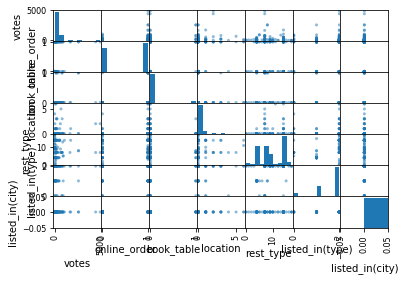

In [63]:
# plt.scatter(cat['rest_type'],num['rate'])

from pandas.plotting import scatter_matrix
_ = scatter_matrix(pd.concat([num,cat],axis=1))

In [65]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Delivery    69
Cafes       24
Buffet       7
Name: listed_in(type), dtype: int64


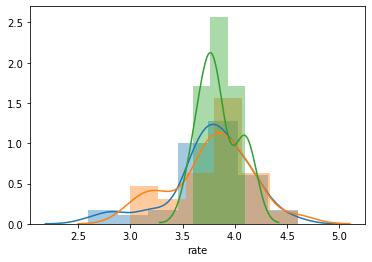

In [25]:
import seaborn as sns
print(data['listed_in(type)'].value_counts())
for t in data['listed_in(type)'].value_counts().index:
    sns.distplot((data.loc[data['listed_in(type)']==t])['rate'])

In [54]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

rest_type = LabelEncoder()

data_f = data.fillna(0)

print(rest_type.fit_transform(data_f['rest_type']))


# data_f = pd.DataFrame(data=rest_type.fit_transform(data_f).toarray,columns=data_f.columns)
# print(data_f)
# data_f = pd.DataFrame(rest_type.fit_transform(data_f),columns=data_f.columns)
# data_f

[ 7  7  5 14  7  7  7  8  4  4  4  4  4  4  5  4  4  4  4  4  4  4  4 15
  4  4  6  4  4  8  4 14  9  9 14  9 14  7  7 14 14 12 14 14  8  9 14  7
  7 14 14 14 10  7 14  9 14  7 14 10  7  7 14  7  1 14 14 13  0 14 17 14
 14  9 14 17 14 14 14 14 11  3 16  7 14  0  7 14 10 14  9 17 12 10  7  2
 14  7 14 10]


In [48]:
a = [['a',1],['b',2]]
en = OneHotEncoder()
en.fit_transform(a).toarray()

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.]])

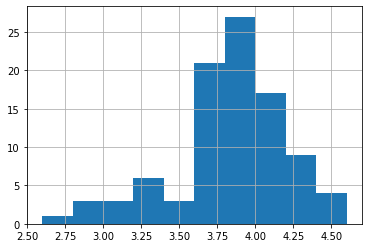

In [48]:
data['rate'].hist()

In [3]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print('####')

online_order
Yes    30444
No     21273
Name: online_order, dtype: int64
####
book_table
No     45268
Yes     6449
Name: book_table, dtype: int64
####
rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1/5     1474
4.1 /5    1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
2.4 /5      30
4.9 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.0 /

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
_ = scatter_matrix

In [19]:
reviews = data['reviews_list'][0][2:-2].split('), (')
reviews[0].split(',')

["'Rated 4.0'",
 " 'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'"]

In [3]:
del data
data

NameError: name 'data' is not defined